Index(['wgi_glacier_id', 'political_unit', 'continent_code', 'drainage_code',
       'free_position_code', 'local_glacier_code', 'glacier_name', 'lat',
       'lon', 'easting', 'northing', 'coordinate_description', 'num_basins',
       'topo_year', 'topo_scale', 'photo_year', 'max_elev', 'mean_elev',
       'min_elev', 'min_elev_exp', 'mean_elev_acc', 'mean_elev_abl',
       'primary_class', 'form', 'frontal_char', 'longi_profile',
       'source_nourish', 'tongue_activity', 'moraines1', 'moraines2',
       'period_activity_start', 'period_activity_end', 'snow_line_elev',
       'snow_line_acy', 'snow_line_date', 'mean_depth', 'depth_acy',
       'total_area', 'area_acy', 'area_in_state', 'area_exp', 'mean_width',
       'mean_length', 'max_length', 'max_length_exp', 'max_length_abl',
       'orientation_acc', 'orientation_abl', 'data_contributor', 'remarks'],
      dtype='object')
       continent_code            lat            lon       easting  \
count   132890.000000  132890.000000

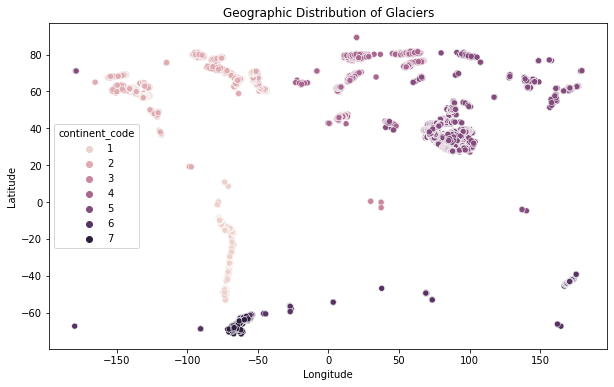

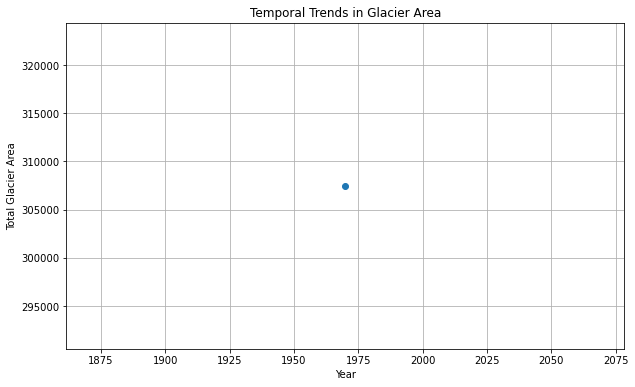

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load the data 
data = pd.read_csv("wgi_feb2012.csv", encoding='latin1')

print(data.columns)  # This will display the list of column names

# Function to filter glaciers
def filter_glaciers(data, region_name):
  
    min_lat, max_lat, min_lon, max_lon = get_region_boundaries(region_name)  
    filtered_data = data[(data["lat"] >= min_lat) & (data["lat"] <= max_lat) &
                          (data["lon"] >= min_lon) & (data["lon"] <= max_lon)]
    return filtered_data


# Exploratory Data Analysis (EDA)

print(data.describe())

# Visualize geographic distribution of glaciers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', data=data, hue='continent_code')
plt.title('Geographic Distribution of Glaciers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Temporal Analysis

data['snow_line_date'] = pd.to_datetime(data['snow_line_date'], errors='coerce')
data['photo_year'] = pd.to_datetime(data['photo_year'], errors='coerce')

# Visualize temporal trends in glacier area
plt.figure(figsize=(10, 6))
data.groupby(data['photo_year'].dt.year)['total_area'].sum().plot(marker='o')
plt.title('Temporal Trends in Glacier Area')
plt.xlabel('Year')
plt.ylabel('Total Glacier Area')
plt.grid(True)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

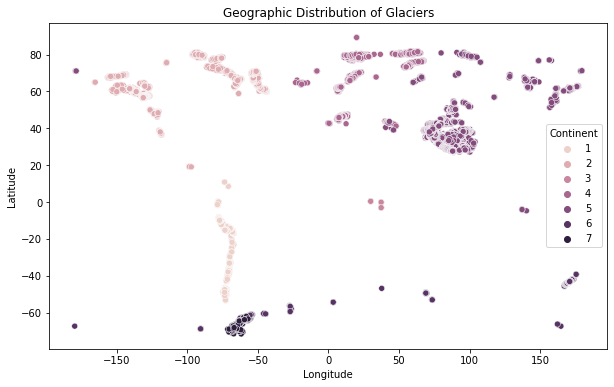

In [2]:
# Visualize the geographic distribution of glaciers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', data=data, hue='continent_code')
plt.title('Geographic Distribution of Glaciers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Continent')
plt.show

<AxesSubplot:>

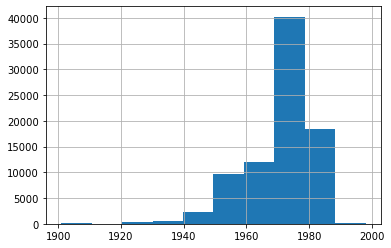

In [3]:
data['topo_year'].hist()

  wgi_glacier_id political_unit  continent_code drainage_code  \
0   AF5Q112B0009             AF               5          Q112   
1   AF5Q112C0025             AF               5          Q112   
2   AF5Q112C0085             AF               5          Q112   
3   AF5Q112C0146             AF               5          Q112   
4   AF5Q112C0151             AF               5          Q112   

  free_position_code local_glacier_code glacier_name     lat     lon  easting  \
0                 B0                009          NaN  34.807  68.891      NaN   
1                 C0                025          NaN  35.438  69.552      NaN   
2                 C0                085          NaN  35.869  70.224      NaN   
3                 C0                146          NaN  35.458  70.023      NaN   
4                 C0                151          NaN  35.409  69.959      NaN   

   ...  area_exp mean_width  mean_length  max_length  max_length_exp  \
0  ...       NaN        NaN          NaN         1

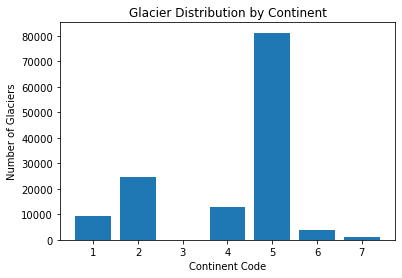

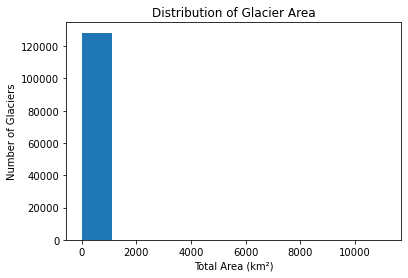

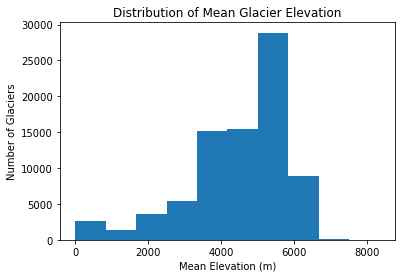

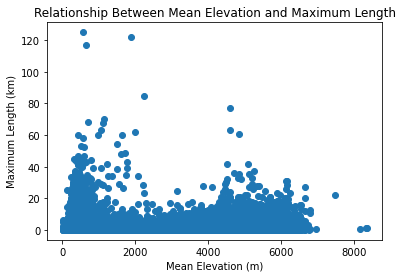

In [4]:
# Explore the data
print(data.head())  # View the first few rows
print(data.columns)  # List column names
print(data.shape)  # Get data dimensions (rows, columns)

# Analyze glacier distribution by continent
continent_counts = data["continent_code"].value_counts()
print(continent_counts)
plt.bar(continent_counts.index, continent_counts.values)
plt.xlabel("Continent Code")
plt.ylabel("Number of Glaciers")
plt.title("Glacier Distribution by Continent")
plt.show()

# Investigate glacier area distribution
plt.hist(data["total_area"])
plt.xlabel("Total Area (km²)")
plt.ylabel("Number of Glaciers")
plt.title("Distribution of Glacier Area")
plt.show()

# Analyze elevation distribution
plt.hist(data["mean_elev"])
plt.xlabel("Mean Elevation (m)")
plt.ylabel("Number of Glaciers")
plt.title("Distribution of Mean Glacier Elevation")
plt.show()

# Explore relationships (optional, replace with your chosen columns)
if "max_length" in data.columns:
  plt.scatter(data["mean_elev"], data["max_length"])
  plt.xlabel("Mean Elevation (m)")
  plt.ylabel("Maximum Length (km)")
  plt.title("Relationship Between Mean Elevation and Maximum Length")
  plt.show()

In [5]:



# Calculate Interquartile Range (IQR)
q1 = data["total_area"].quantile(0.25)
q3 = data["total_area"].quantile(0.75)
iqr = q3 - q1

# Identify potential outliers (values outside 1.5 IQR from quartiles)
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outlier_indices = data[(data["total_area"] < lower_bound) | (data["total_area"] > upper_bound)].index

# Explore the outliers
outlier_data = data.loc[outlier_indices]
print(outlier_data)  # View rows with potentially extreme area values



       wgi_glacier_id political_unit  continent_code drainage_code  \
7        AF5X14005043             AF               5          X140   
8        AF5X14005081             AF               5          X140   
14       AQ6C20111003             AQ               6          C201   
15       AQ6C20200016             AQ               6          C202   
17       AQ6C20200030             AQ               6          C202   
...               ...            ...             ...           ...   
132825   SU5X14319076             SU               5          X143   
132826   SU5X14319082             SU               5          X143   
132834   US2A00101019             US               2          A001   
132868   US2M00213002             US               2          M002   
132879   US2M00282003             US               2          M002   

       free_position_code local_glacier_code glacier_name     lat      lon  \
7                      05                043          NaN  37.903   70.969   
8  

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7338aec43ee0>
Traceback (most recent call last):
  File "/home/atul/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/atul/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/atul/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/atul/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

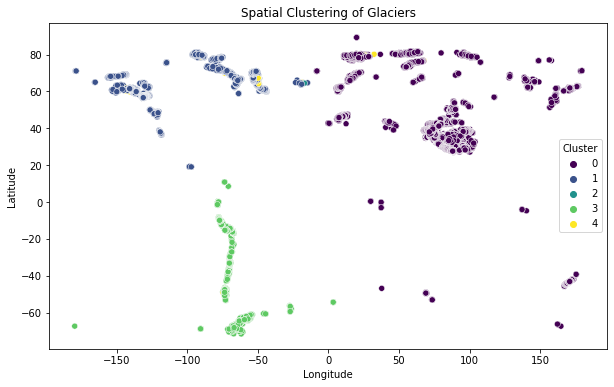

In [6]:
# Select features for clustering (e.g., latitude, longitude, total area)
features_for_clustering = ['lat', 'lon', 'total_area']

"""
identify spatial clusters of glaciers based on their geographic coordinates (latitude and longitude) and total area. This clustering analysis helps in understanding the spatial
distribution patterns of glaciers and identifying regions with similar glacier characteristics.
which reveal areas with high concentrations of glaciers, regions with glaciers of similar sizes, or spatial patterns indicating environmental factors influencing glacier distribution.
"""
# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data[features_for_clustering]), columns=features_for_clustering)

# Perform K-means clustering on the imputed data
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(data_imputed)

# Visualize clusters on a map
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', data=data, hue='cluster', palette='viridis')
plt.title('Spatial Clustering of Glaciers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()



Explained variance ratio: [0.99858285 0.00141649]


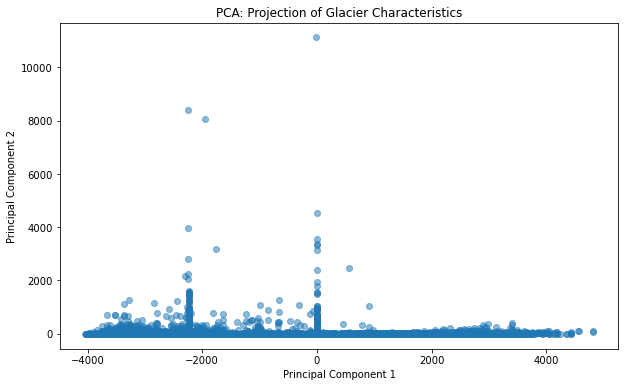

In [12]:
# Define features for PCA
features_for_pca = ['max_elev', 'total_area', 'mean_length']

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[features_for_pca])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_imputed)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA: Projection of Glacier Characteristics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


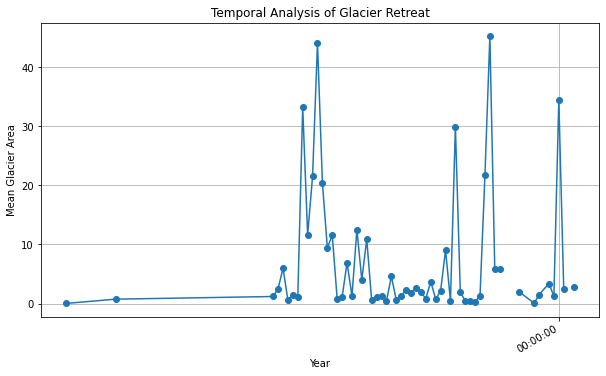

In [8]:
# Temporal Analysis of Glacier Retreat
plt.figure(figsize=(10, 6))
data.groupby('photo_year')['total_area'].mean().plot(marker='o')
plt.title('Temporal Analysis of Glacier Retreat')
plt.xlabel('Year')
plt.ylabel('Mean Glacier Area')
plt.grid(True)
plt.show()
